# Economic Characteristics of Immigrants in the U.S.
By Christopher Choi and David McLaughlin  
New York University Stern School of Business  
December 2017  

## Introduction
We analyzed data from the U.S. Census Bureau to understand the demographic and economic attributes of the nation's immigrant population and whether there is evidence that immigrants have any positive or negative impact on the U.S. economy and workers. We found that during the last two decades immigrants have become a larger share of the general population and the labor force. They also make up a disproportionate share of the labor force relative to their share of the wider population. According to state-level data on employment and income, there is no relationship between the number of immigrants in a state and the unemployment rate. The data does indicate, however, a positive relationship between a state's immigrant population and its median household income.


In [97]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

## Part I  
We first examined the growth of the immigrant population in the U.S. Immigrants - both naturalized citizens and non-citizens -- made up about 13 percent of the U.S. population in 2014, the latest year for which data is available. That is up from 9 percent in the mid-1990s. The growth was driven by naturalized citizens. The percentage of non-citizens as a share of the population remained largely flat. From 1995 to 2014, the immigrant population grew far faster than that of native-born Americans. The number of immigrants increased 66 percent, while the native-born population grew 15 percent.

In [98]:
immpopdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/immigrantpoptotals.xlsx')

In [99]:
immpopdf['Immigrant Total'] = immpopdf['Naturalized Citizen'] + immpopdf['Not Citizen']
immpopdf['Native Pct'] = (immpopdf['Native']/immpopdf['Total'])*100
immpopdf['Immigrant Pct'] = (immpopdf['Immigrant Total']/immpopdf['Total'])*100
immpopdf['Not Citizen Pct'] = (immpopdf['Not Citizen']/immpopdf['Total'])*100
immpopdf

,Year,Total,Native,Naturalized Citizen,Not Citizen,Immigrant Total,Native Pct,Immigrant Pct,Not Citizen Pct
0,2014,313401,272658,19134,21609,40743,86.999722,13.000278,6.895000
1,2013,311116,271010,18200,21906,40106,87.108988,12.891012,7.041104
2,2012,308827,268851,17934,22042,39976,87.055536,12.944464,7.137329
3,2011,306110,267884,16801,21424,38225,87.512332,12.487341,6.998791
4,2010,304280,266674,16024,21581,37605,87.640989,12.358683,7.092481
5,2009,301483,264733,15475,21274,36749,87.810258,12.189410,7.056451
6,2008,299106,261842,15050,22214,37264,87.541540,12.458460,7.426799
7,2007,296824,259545,14538,22741,37279,87.440706,12.559294,7.661442
8,2006,293834,258175,13884,21775,35659,87.864236,12.135764,7.410647
9,2005,291166,255952,13507,21707,35214,87.905868,12.094132,7.455197


In [100]:
immpopchartdf1 = immpopdf[['Year', 'Immigrant Pct']]
immpopchartdf1 = immpopchartdf1.set_index('Year')
immpopchartdf1 = immpopchartdf1.sort_index(ascending=True, axis=0)

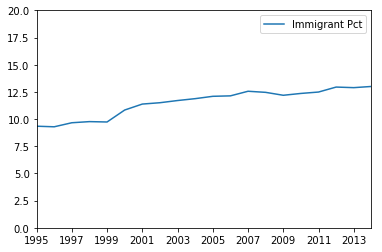

In [101]:
fig, ax = plt.subplots()
immpopchartdf1.plot(ax=ax)
ax.set_ylim([0,20])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [102]:
immpopchartdf2 = immpopdf[['Year', 'Not Citizen Pct']]
immpopchartdf2 = immpopchartdf2.set_index('Year')
immpopchartdf2 = immpopchartdf2.sort_index(ascending=True, axis=0)

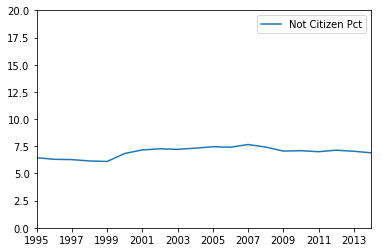

In [103]:
fig, ax = plt.subplots()
immpopchartdf2.plot(ax=ax)
ax.set_ylim([0,20])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [104]:
immpopchartdf3 = immpopdf[['Year', 'Naturalized Citizen', 'Not Citizen']]
immpopchartdf3 = immpopchartdf3.set_index('Year')
immpopchartdf3 = immpopchartdf3.sort_index(ascending=True, axis=0)

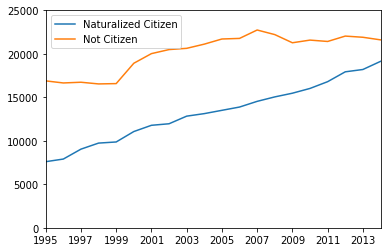

In [105]:
fig, ax = plt.subplots()
immpopchartdf3.plot(ax=ax)
ax.set_ylim([0,25000])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [49]:
natimmdf = immpopdf[['Native', 'Immigrant Total']]
natpctchange = (natimmdf.iloc[0]['Native']-natimmdf.iloc[19]['Native'])/natimmdf.iloc[19]['Native']
natpctchange

0.14748289242216367

In [51]:
immpctchange = (natimmdf.iloc[0]['Immigrant Total']-natimmdf.iloc[19]['Immigrant Total'])/natimmdf.iloc[19]['Immigrant Total']
immpctchange

0.66345486465520764

## Part II
Next we examined various labor-force characteristics of the immigrant population. From 1996 to 2014, immigrants' share of the labor force relative to native-born workers increased from 11 percent to 17 percent. Most immigrant workers in the U.S. were born in Mexico. Our analysis shows that immigrant workers made up a disproportionately large share of the labor force relative to their share of the overall population. They are effectively working harder as a group. The last chart in this section illustrates this trend.

In [106]:
employstatsdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/fbemploystatus19962016.xls')

In [107]:
laborforcedf = employstatsdf.loc[['Foreign born pct total']]
laborforcedf = laborforcedf.T
laborforcedf

,Foreign born pct total
1996,0.107605
1997,0.113091
1998,0.116886
1999,0.118514
2000,0.132982
2001,0.138248
2002,0.139987
2003,0.144134
2004,0.145406
2005,0.147616


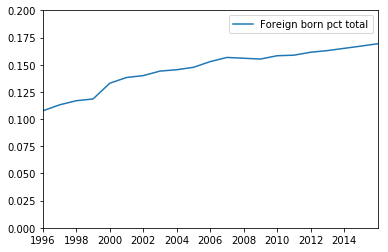

In [108]:
fig, ax = plt.subplots()
laborforcedf.plot(ax=ax)
plt.xticks(np.arange(1996, 2016, 2.0))
ax.set_ylim([0,0.20])
plt.show()

In [109]:
dfemploy14 = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/censusemploy2014.xlsx')

In [110]:
dftotals = dfemploy14.iloc[1][['Asia Total', 'Europe Total', 'Mexico Total', 'Other LatAm Total', 'Other Total']]

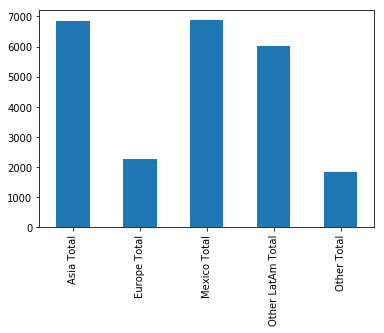

In [111]:
fig, ax = plt.subplots()
dftotals.plot(ax=ax, kind='bar')
plt.show()

In [112]:
immlfdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/immlaborforcestats.xlsx')

In [113]:
immlfdf['Foreign Born Share Of Labor Force'] = (immlfdf['Foreign Born Labor Force Level']/(immlfdf['Foreign Born Labor Force Level']+
                                                immlfdf['Native Born Labor Force Level']))*100

In [114]:
immlaborsharedf = immlfdf[['Year', 'Foreign Born Share Of Labor Force']]
immlaborsharedftrim = immlaborsharedf[0:13]
immpctdf = immpopdf[['Year', 'Immigrant Pct']]
immpctdftrim = immpctdf[0:13]
immcombodf = pd.merge(immlaborsharedftrim,
                      immpctdftrim,
                      how='left',
                      on='Year')

In [115]:
immcombodf

,Year,Foreign Born Share Of Labor Force,Immigrant Pct
0,2002,13.998744,11.504811
1,2003,14.413351,11.705889
2,2004,14.540607,11.878729
3,2005,14.761586,12.094132
4,2006,15.286473,12.135764
5,2007,15.669653,12.559294
6,2008,15.596259,12.458460
7,2009,15.522051,12.189410
8,2010,15.826992,12.358683
9,2011,15.877800,12.487341


In [116]:
immcombodf = immcombodf.set_index('Year')

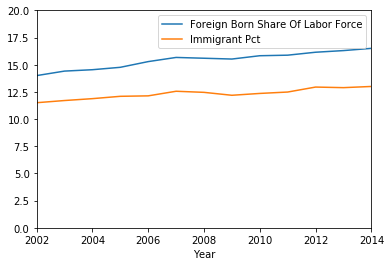

In [118]:
fig, ax = plt.subplots()
immcombodf.plot(ax=ax)
ax.set_ylim(ymin=0, ymax=20)
plt.show()